In [1]:
#Dependencies and setup

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts



In [2]:
#Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#Read the city data csv
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#Read teh ride data csv
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#GEt the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#Get the unique calues of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Get the total of each city type
sum(city_data_df['type'] == 'Urban')


66

In [10]:
sum(city_data_df['type'] == 'Suburban')

36

In [11]:
sum(city_data_df['type'] == 'Rural')

18

In [12]:
#Get the columns and the rowas that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
#Get the types for each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
#combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on=["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [16]:
#Create the urban dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
#Create Suburban and Rural dataframes
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [18]:
#get the number of rides in the urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
#get suburban and rural ride counts
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [20]:
#get average fare in the urban cities
urban_average_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_average_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [21]:
#get average fare for suburban and rural cities
suburban_average_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_average_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [22]:
#get average number of drivers in urban cities
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [23]:
#get average number of drivers in suburban and rural cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

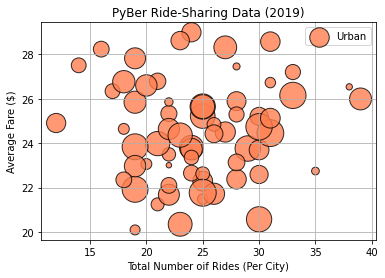

In [24]:
#build the urban scatter plot
plt.scatter(urban_ride_count, urban_average_fare, 
            s=10*urban_driver_count,
            c = 'coral',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number oif Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

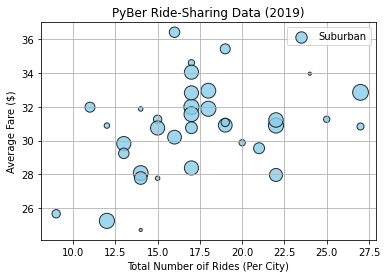

In [25]:
#build the suburban scatter plot
plt.scatter(suburban_ride_count, suburban_average_fare, 
            s=10*suburban_driver_count,
            c = 'skyblue',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number oif Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

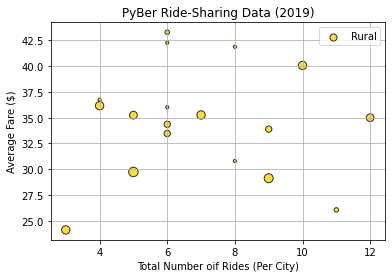

In [26]:
#build the rural scatter plot
plt.scatter(rural_ride_count, rural_average_fare, 
            s=10 * rural_driver_count,
            c = 'gold',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number oif Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

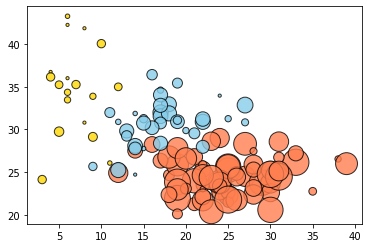

In [27]:
#plot all the scatters
plt.scatter(urban_ride_count, urban_average_fare, 
            s=10*urban_driver_count,
            c = 'coral',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Urban')
plt.scatter(suburban_ride_count, suburban_average_fare, 
            s=10*suburban_driver_count,
            c = 'skyblue',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Suburban')
plt.scatter(rural_ride_count, rural_average_fare, 
            s=10 * rural_driver_count,
            c = 'gold',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Rural')
plt.show()

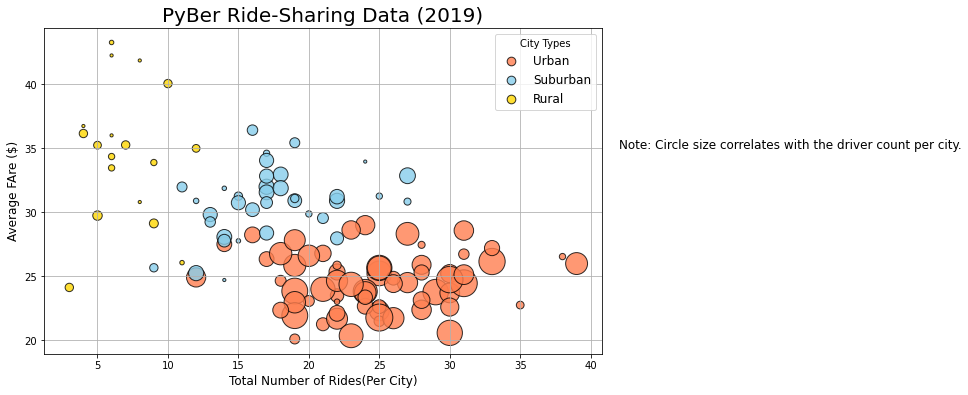

<Figure size 432x288 with 0 Axes>

In [28]:
#plot all the scatters
plt.subplots(figsize = (10,6))
plt.scatter(urban_ride_count, urban_average_fare, 
            s=10*urban_driver_count,
            c = 'coral',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Urban')
plt.scatter(suburban_ride_count, suburban_average_fare, 
            s=10*suburban_driver_count,
            c = 'skyblue',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Suburban')
plt.scatter(rural_ride_count, rural_average_fare, 
            s=10 * rural_driver_count,
            c = 'gold',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Rural')

#chart properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average FAre ($)", fontsize = 12)
plt.xlabel("Total Number of Rides(Per City)", fontsize = 12)
plt.grid(True)

#Create the legend
lgnd = plt.legend(fontsize = '12', mode = 'Expanded', 
                 scatterpoints = 1, loc = 'best', title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

#Add a text label
plt.text(42,35, "Note: Circle size correlates with the driver count per city.", fontsize = 12)
plt.show()

#Save it
plt.savefig("analysis/Fig1.png")

# Module 5.4.1


In [29]:
#Get summary statistics using describe
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [30]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [31]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [32]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [33]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [34]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [35]:
#get statistics using Pandas
#calculate the mean of the ride count for each city trype
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [36]:
#get the median ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [37]:
#get the mode of the urban ride count
urban_ride_count.mode()


0    22
1    25
dtype: int64

In [38]:
#get the mode of the suburban ride count
suburban_ride_count.mode()



0    17
dtype: int64

In [39]:
#get the mode of the rural ride count
rural_ride_count.mode()



0    6
dtype: int64

In [40]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
median_urban_ride_count = np.median(urban_ride_count)
mode_urban_ride_count = sts.mode(urban_ride_count)

print(f"The mean the the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
print(f"The median the the ride counts for urban trips is {median_urban_ride_count:.2f}.")
print(f"The mode the the ride counts for urban trips is {mode_urban_ride_count}.")

The mean the the ride counts for urban trips is 24.62.
The median the the ride counts for urban trips is 24.00.
The mode the the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [41]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
median_suburban_ride_count = np.median(suburban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)

print(f"The mean the the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")
print(f"The median the the ride counts for urban trips is {median_suburban_ride_count:.2f}.")
print(f"The mode the the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean the the ride counts for urban trips is 17.36.
The median the the ride counts for urban trips is 17.00.
The mode the the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [42]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
median_rural_ride_count = np.median(rural_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)

print(f"The mean the the ride counts for urban trips is {mean_rural_ride_count:.2f}.")
print(f"The median the the ride counts for urban trips is {median_rural_ride_count:.2f}.")
print(f"The mode the the ride counts for urban trips is {mode_rural_ride_count}.")

The mean the the ride counts for urban trips is 6.94.
The median the the ride counts for urban trips is 6.00.
The mode the the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [43]:
#get teh fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [44]:
#Get the mean, median and mode of urban fare
mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)

print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [45]:
#get teh fares for the suburban cities
suburban_fares = suburban_cities_df["fare"]
#suburban_fares.head()

#Get the mean, median and mode of suburban fare
mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)

print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [46]:
#get teh fares for the rural cities
rural_fares = rural_cities_df["fare"]
#rural_fares.head()

#Get the mean, median and mode of rural fare
mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)

print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")


The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [47]:
#get teh drivers for the urban cities
urban_drivers = urban_cities_df["driver_count"]
#urban_drivers.head()

#Get the mean, median and mode of urban driver
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

print(f"The mean driver count for urban trips is {mean_urban_drivers:.2f}.")
print(f"The median driver count for urban trips is {median_urban_drivers:.2f}.")
print(f"The mode driver count for urban trips is {mode_urban_drivers}.")



The mean driver count for urban trips is 36.68.
The median driver count for urban trips is 37.00.
The mode driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [48]:
#get teh drivers for the suburban cities
suburban_drivers = suburban_cities_df["driver_count"]
#suburban_drivers.head()

#Get the mean, median and mode of suburban driver
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

print(f"The mean driver price for suburban trips is {mean_suburban_drivers:.2f}.")
print(f"The median driver price for suburban trips is {median_suburban_drivers:.2f}.")
print(f"The mode driver price for suburban trips is {mode_suburban_drivers}.")


The mean driver price for suburban trips is 13.71.
The median driver price for suburban trips is 16.00.
The mode driver price for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [49]:
#get teh drivers for the rural cities
rural_drivers = rural_cities_df["driver_count"]
#rural_drivers.head()

#Get the mean, median and mode of rural driver
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

print(f"The mean driver price for rural trips is {mean_rural_drivers:.2f}.")
print(f"The median driver price for rural trips is {median_rural_drivers:.2f}.")
print(f"The mode driver price for rural trips is {mode_rural_drivers}.")


The mean driver price for rural trips is 4.30.
The median driver price for rural trips is 4.00.
The mode driver price for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


<function matplotlib.pyplot.show(close=None, block=None)>

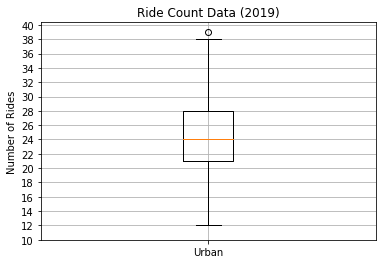

In [50]:
#create a box-and-whoisker plot for the urban cities ride count 
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

#Add title, y label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show

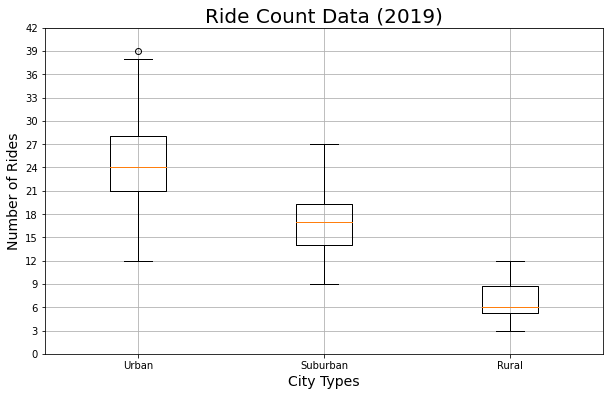

In [51]:
#all three on one box chart
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax=plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

#Save it
plt.savefig("analysis/Fig2.png")
plt.show()

In [52]:
#Find the city that is the outlier and has 39 number of rides
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count")

West Angela has the highest rider count


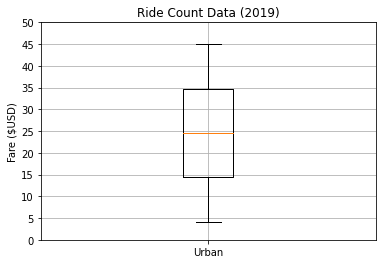

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [53]:
#Create a box&whisker with the urban fare data
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

#Add Title and labelk
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()


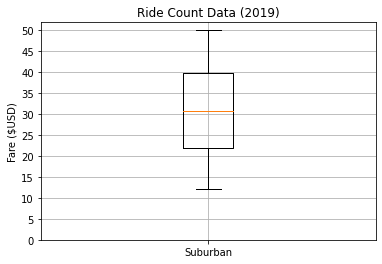

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [54]:
#Create a box&whisker with the wsuburban fare data
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

#Add Title and labelk
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

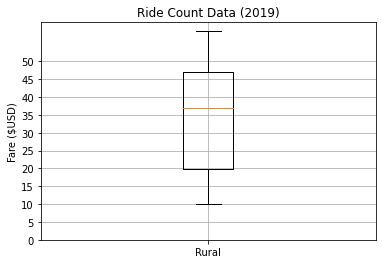

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [55]:
#Create a box&whisker with the wsuburban fare data
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

#Add Title and labelk
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

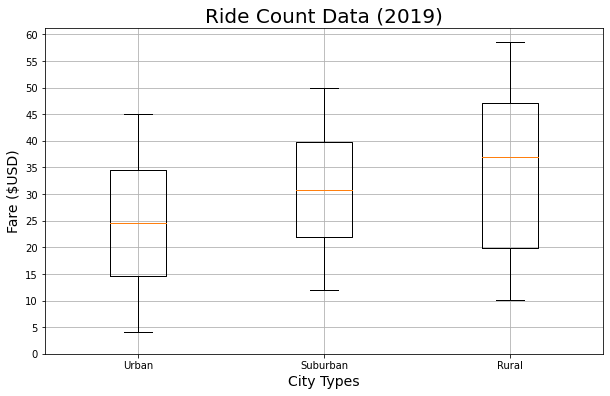

In [56]:
#get all three together
fare_data = [urban_fares, suburban_fares, rural_fares]
x_labels = ['Urban', 'Suburban', 'Rural']
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels = x_labels)

ax.set_title('Ride Count Data (2019)', fontsize = 20)
ax.set_ylabel('Fare ($USD)', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.set_yticks(np.arange(0,61, step=5.0))
ax.grid()

plt.savefig('analysis/Fig3.png')
plt.show()


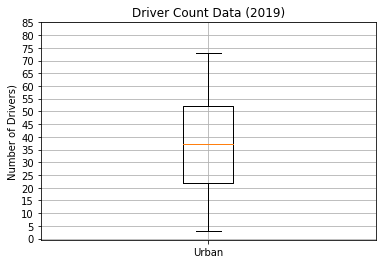

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [59]:
#create a box plot for urban driver count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

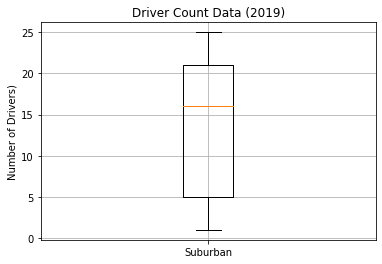

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [61]:
#create a box plot for suburban driver count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

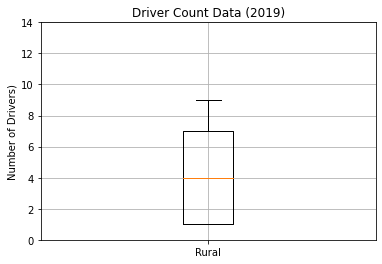

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [64]:
#create a box plot for rural driver count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 15, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

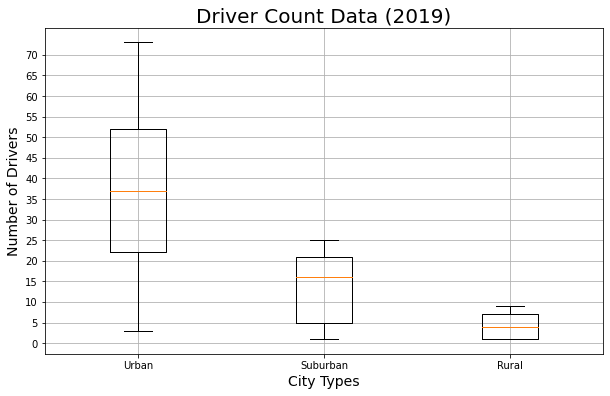

In [68]:
#Box all three of em
#get all three together
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
x_labels = ['Urban', 'Suburban', 'Rural']
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_data, labels = x_labels)

ax.set_title('Driver Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Drivers', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.set_yticks(np.arange(0,75, step=5.0))
ax.grid()

plt.savefig('analysis/Fig4.png')
plt.show()